# Backtesting on LGBMClassifier

In [1]:
import os
import json
import numpy as np
import pandas as pd
import vectorbt as vbt
from lightgbm import LGBMClassifier
from tqdm import tqdm

from strategies.LGBM_classifier_strategy import LGBMClassifierStrategy


import numpy as np
import pandas as pd
import vectorbt as vbt


from backtesting_utils import (
    run_ml_weekly_strategy, weights_stat_report, plot_nist_stock_in_profile, 
    plot_stock_weights_in_profile, plot_hist_stock_weights, plot_hist_returns, 
    extended_stats, rolling_sharp, rolling_valatility,
    save_portfolio_stats, load_backtesting_dataset, plot_portfolio_value, plot_dayly_return, plot_allocation
    )



In [2]:
backtesting: str = "reports/strategies/LGBM_Classifier.csv"

In [3]:
df = load_backtesting_dataset()

strategy = LGBMClassifierStrategy(df)
pf, target_weights = run_ml_weekly_strategy(df, strategy)


✅ Загружено 15,143 строк по 45 тикерам.
Compute for 2019-12-16 00:00:00
Compute for 2020-01-17 00:00:00
Compute for 2019-12-30 00:00:00

Обучаем модель на 2689 строк (до 2019-12-30)
Обучение модели...

Обучаем модель на 2599 строк (до 2019-12-16)
Обучение модели...

Обучаем модель на 2779 строк (до 2020-01-17)
Обучение модели...
Compute for 2019-12-23 00:00:00
Compute for 2019-12-09 00:00:00

Обучаем модель на 2644 строк (до 2019-12-23)
Обучение модели...

Обучаем модель на 2554 строк (до 2019-12-09)
Обучение модели...
Compute for 2020-01-10 00:00:00

Обучаем модель на 2734 строк (до 2020-01-10)
Обучение модели...
Compute for 2020-01-06 00:00:00

Обучаем модель на 2716 строк (до 2020-01-06)
Compute for 2020-02-07 00:00:00
Обучение модели...

Обучаем модель на 2914 строк (до 2020-02-07)
Обучение модели...
Compute for 2020-01-31 00:00:00

Обучаем модель на 2869 строк (до 2020-01-31)
Обучение модели...
Compute for 2020-01-24 00:00:00

Обучаем модель на 2824 строк (до 2020-01-24)
Обучение 

/Users/beilakaliev/projects/trading/trading-ml-modeling/modeling/backtesting_utils.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06666666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  target_weights.loc[dt, t] = w
/Users/beilakaliev/projects/trading/trading-ml-modeling/modeling/backtesting_utils.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06666666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  target_weights.loc[dt, t] = w
/Users/beilakaliev/projects/trading/trading-ml-modeling/modeling/backtesting_utils.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06666666666666667' has dtype incompatible with int64, please 

In [4]:
# Сколько акций держим в среднем (не нулевых)
weights_stat_report(target_weights)


Среднее количество акций в портфеле: 33.25879230258792
Минимальное количество акций в портфеле: 0
Минимальное ненулевое количество акций в портфеле: 15
Максимальное количество акций в портфеле: 45


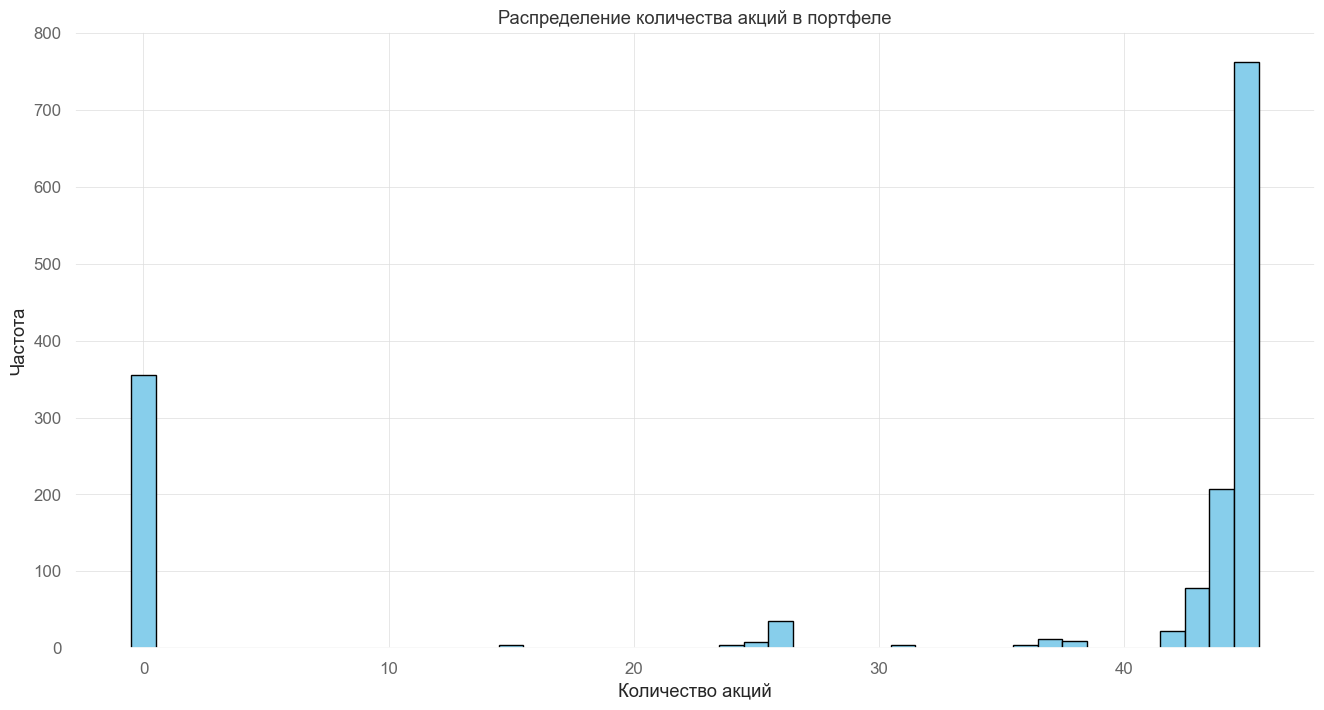

In [5]:
plot_nist_stock_in_profile(target_weights)

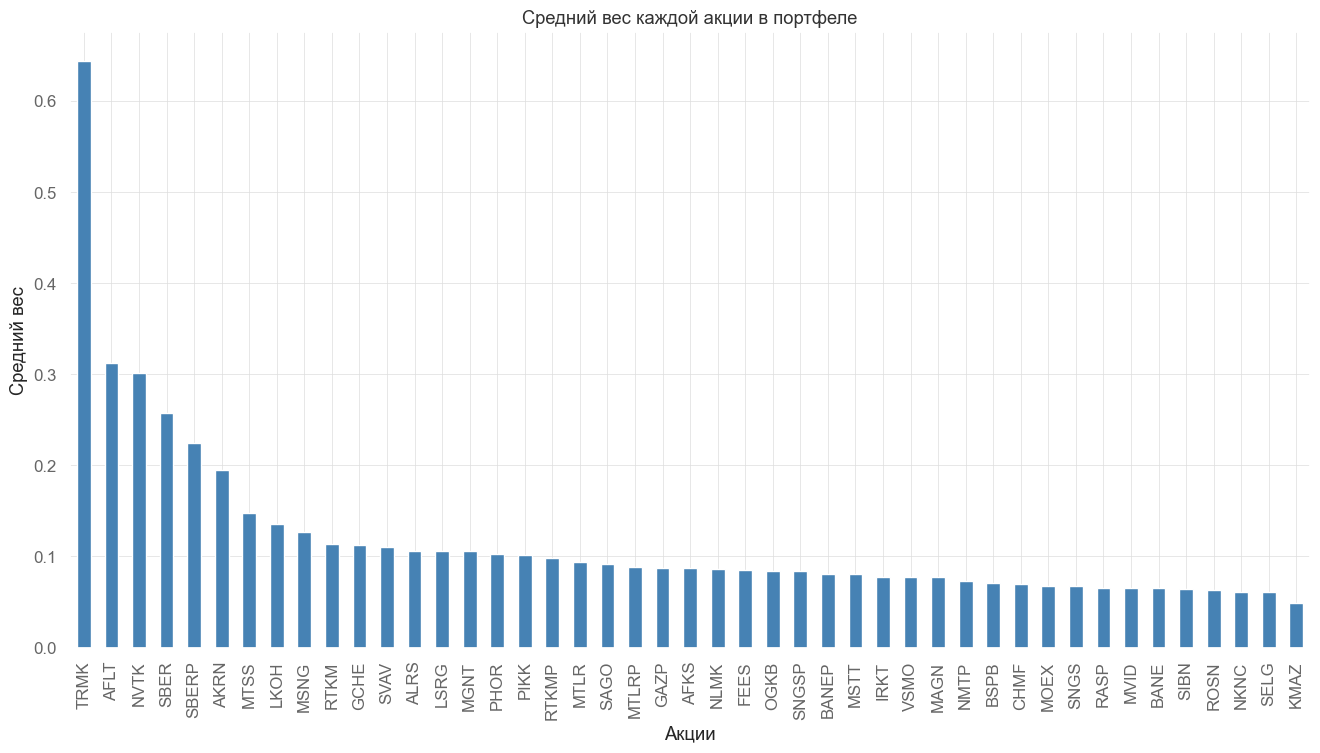

In [6]:
plot_stock_weights_in_profile(target_weights)

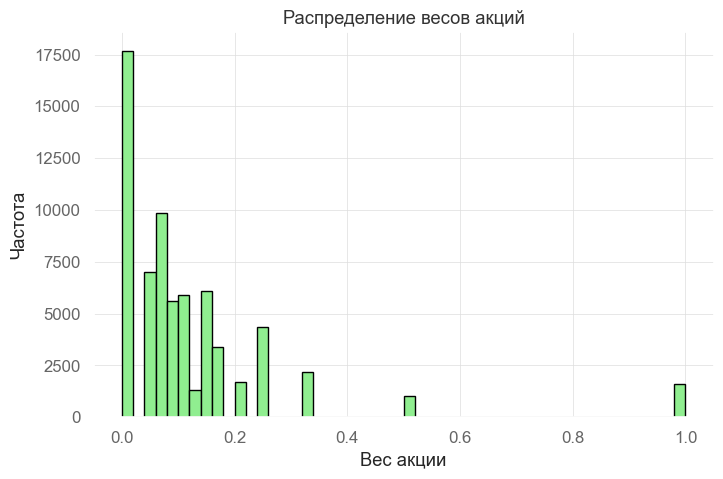

In [7]:
plot_hist_stock_weights(target_weights)

In [8]:
vbt.settings['plotting']['layout']['width'] = 1600
vbt.settings['plotting']['layout']['height'] = 1000


<Axes: xlabel='Date'>

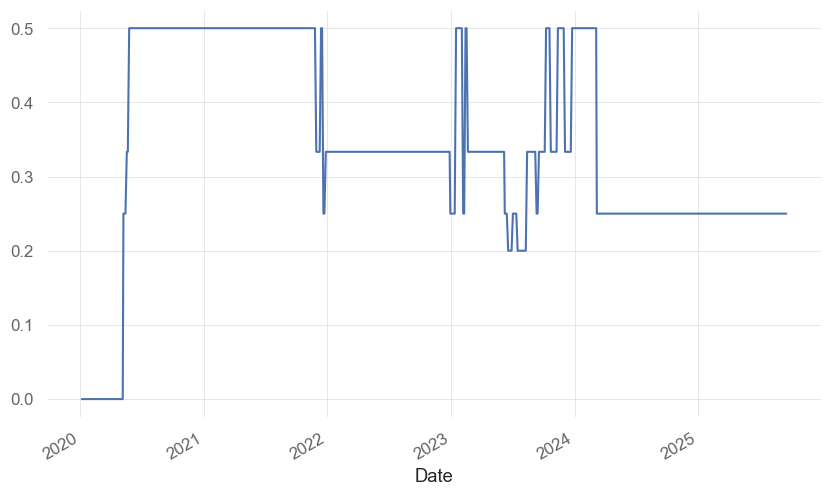

In [9]:
target_weights[target_weights.index > '2020-01-01'].SBER.plot()

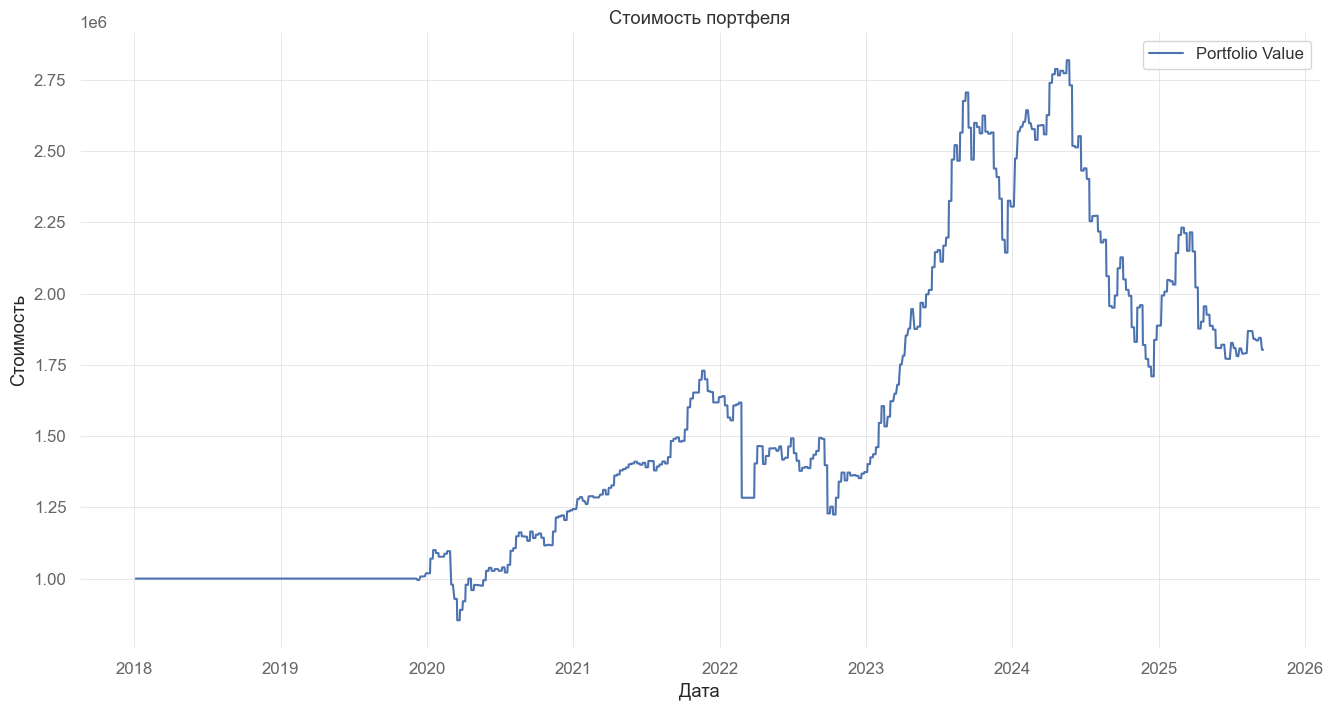

In [10]:
plot_portfolio_value(pf)

In [11]:
pf.plot()


/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning: Subplot 'orders' does not support grouped data
  warnings.warn(warning_message)
/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning: Subplot 'trade_pnl' does not support grouped data
  warnings.warn(warning_message)


FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#7f7f7f'},
              'name': 'Benchmark',
              'showlegend': True,
              'type': 'scatter',
              'uid': '5304a301-3c05-4725-9102-5970a79078b7',
              'x': array([datetime.datetime(2018, 1, 5, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0),
                          datetime.datetime(2018, 1, 18, 0, 0), ...,
                          datetime.datetime(2025, 9, 15, 0, 0),
                          datetime.datetime(2025, 9, 17, 0, 0),
                          datetime.datetime(2025, 9, 18, 0, 0)], shape=(1507,), dtype=object),
              'xaxis': 'x',
              'y': array([1.        , 1.00175982, 1.00175982, ..., 1.573177  , 1.5709616 ,
                          1.57127274], shape=(1507,)),
              'yaxis': 'y'},
             {'hoverinfo': 'skip',
              'legendgroup': '1',
              'line': {'color': 'rgba(0, 0, 0, 0)', '

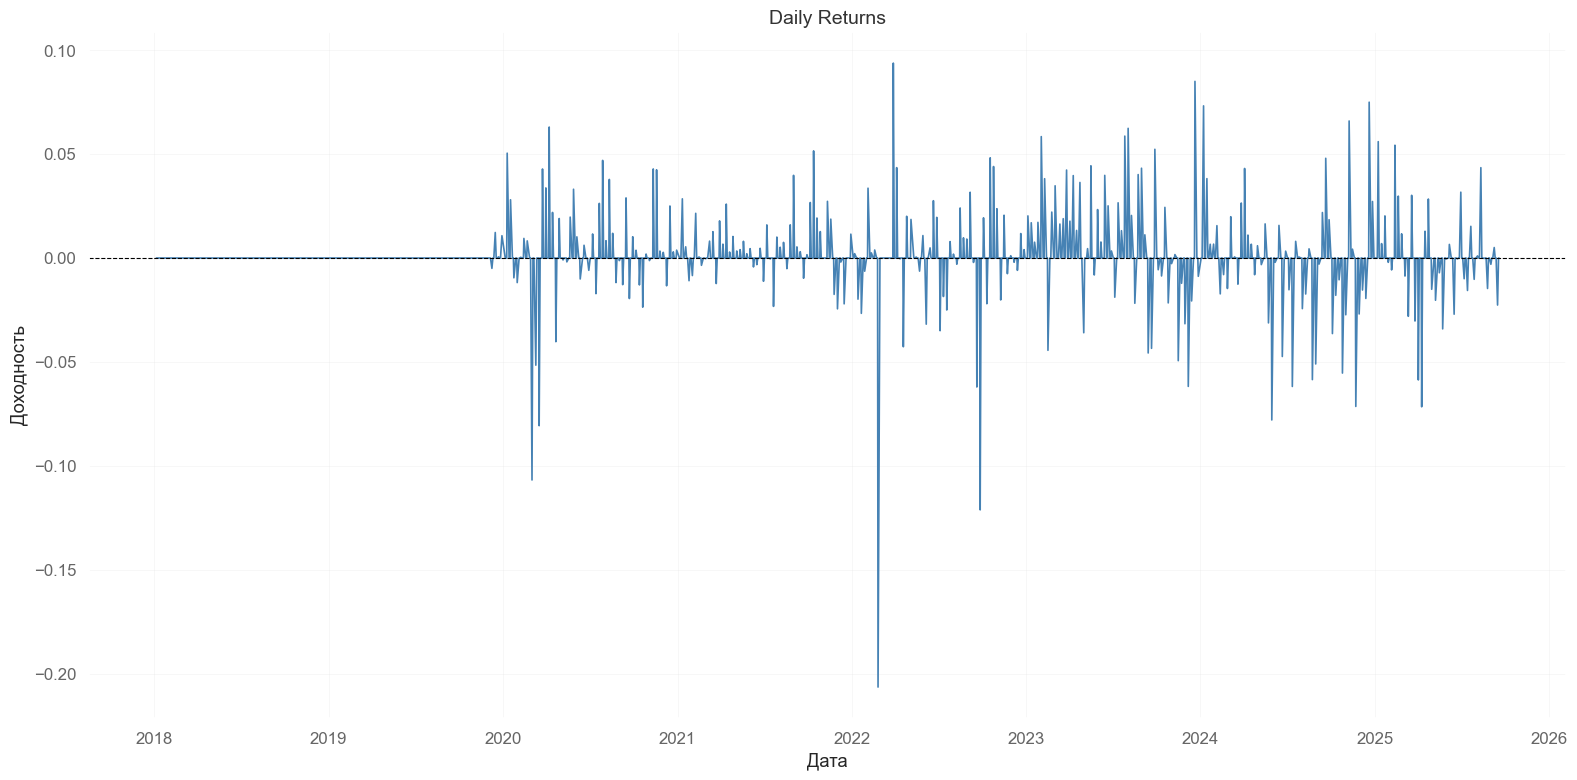

In [12]:
plot_dayly_return(pf)

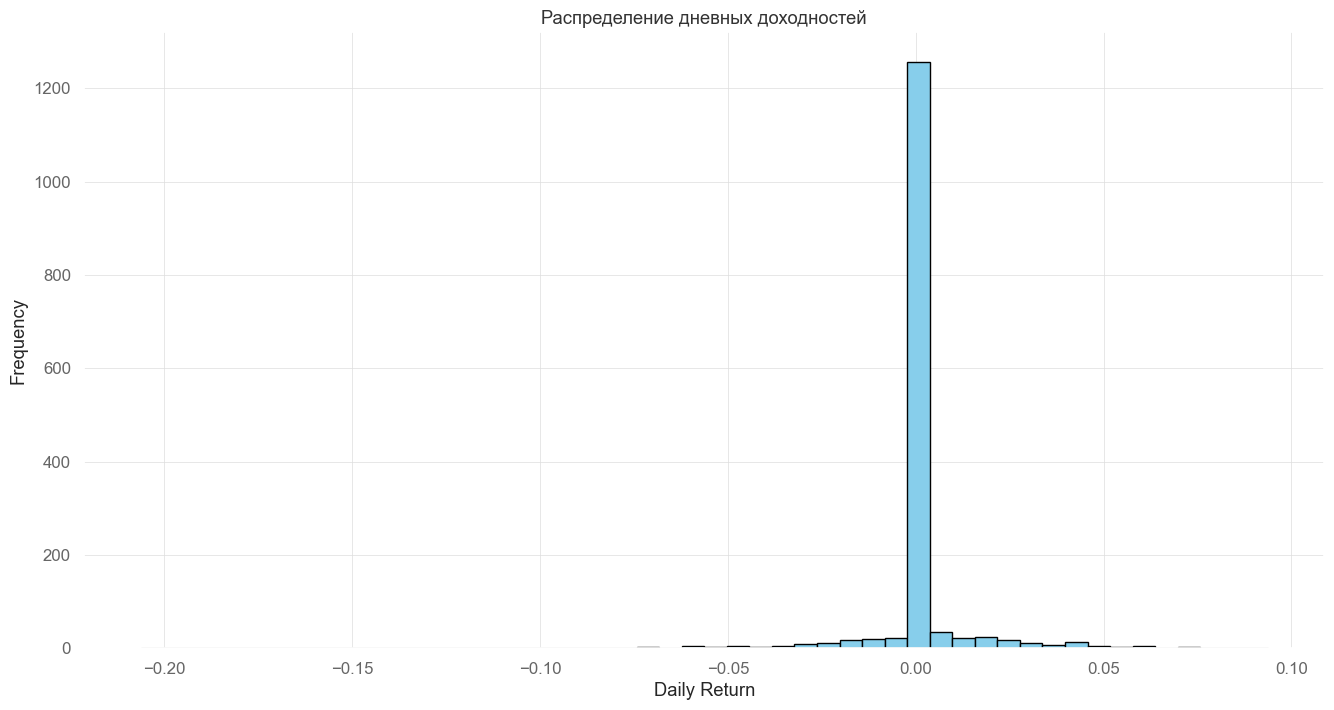

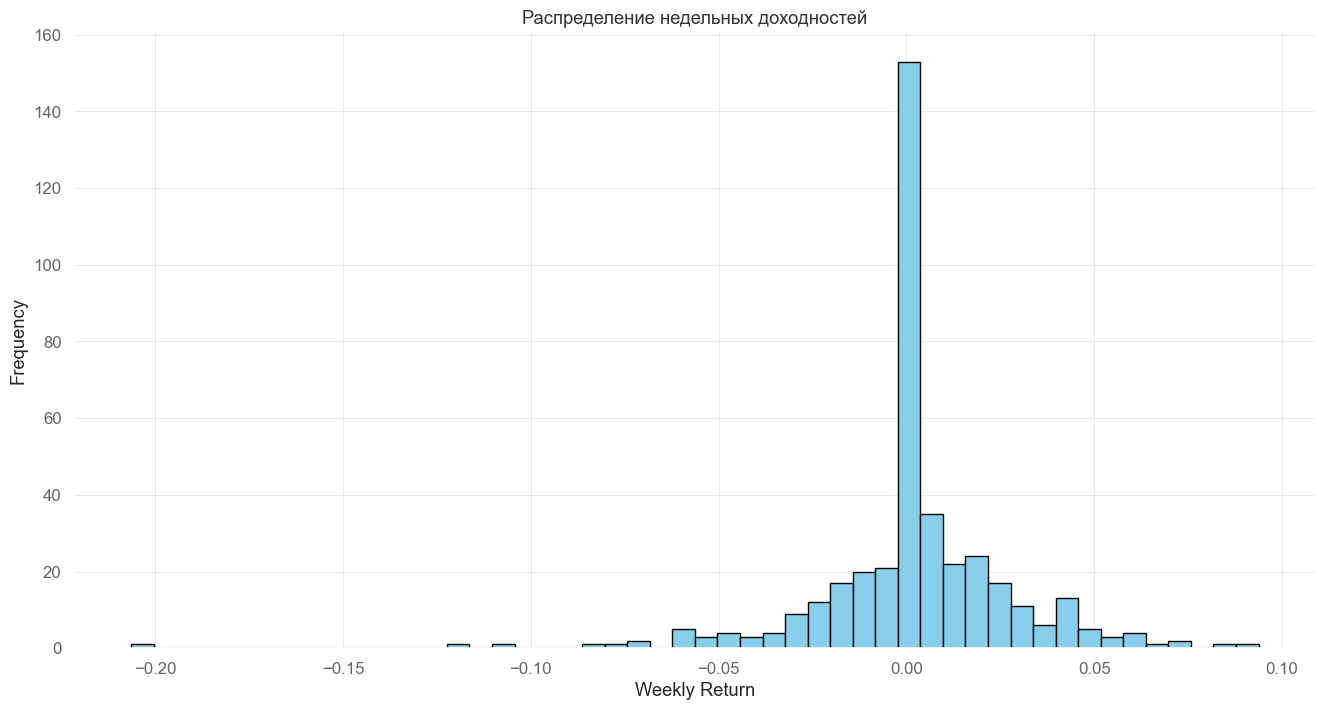

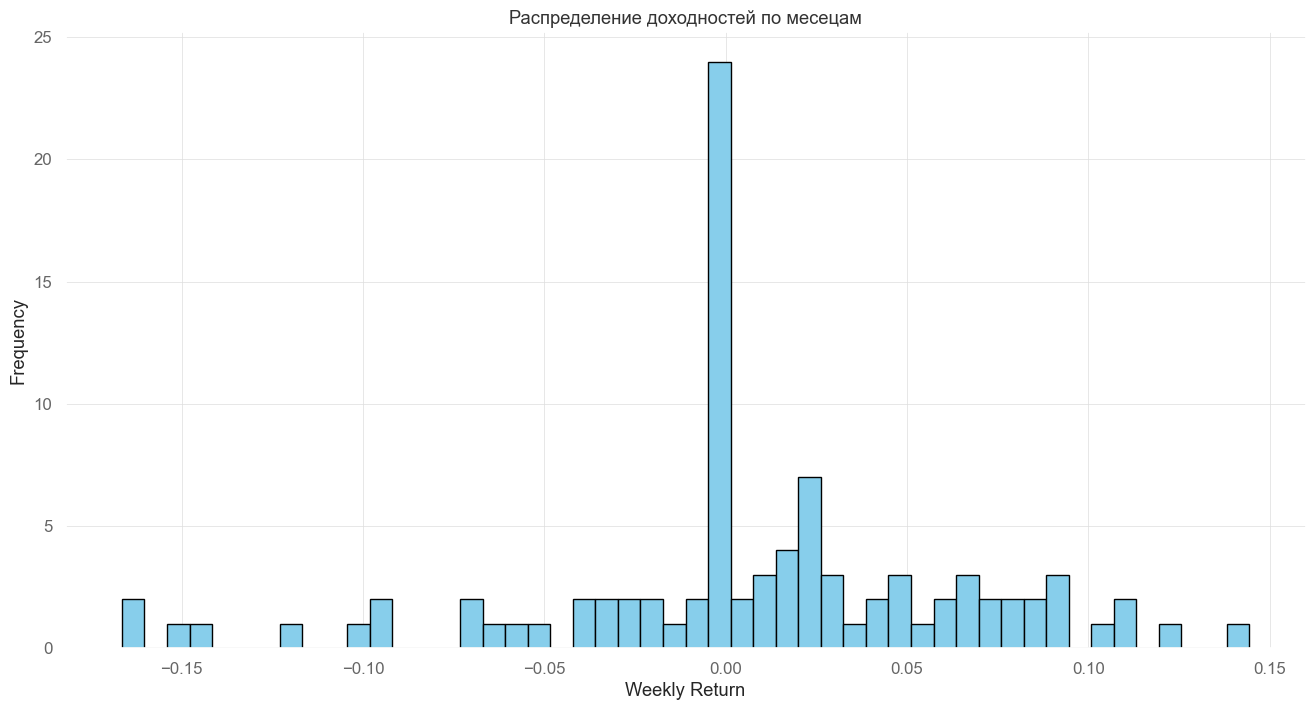

In [13]:
plot_hist_returns(pf)

In [14]:
pf.drawdowns.plot(title="Drawdowns")


FigureWidget({
    'data': [{'line': {'color': '#1f77b4'},
              'name': 'group',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'b939d601-ec53-40f8-b1c9-f8136f66ebff',
              'x': array([datetime.datetime(2018, 1, 5, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0),
                          datetime.datetime(2018, 1, 18, 0, 0), ...,
                          datetime.datetime(2025, 9, 15, 0, 0),
                          datetime.datetime(2025, 9, 17, 0, 0),
                          datetime.datetime(2025, 9, 18, 0, 0)], shape=(1507,), dtype=object),
              'y': array([1000000.        , 1000000.        , 1000000.        , ...,
                          1803192.86236636, 1803192.86236636, 1803192.86236636], shape=(1507,))},
             {'customdata': array([[ 1],
                                   [ 3],
                                   [12],
                                   [17],
                

In [15]:
pf.plot(subplots=['orders', 'value', 'drawdowns'], title="Portfolio Overview")


/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data



FigureWidget({
    'data': [{'hoverinfo': 'skip',
              'legendgroup': '0',
              'line': {'color': 'rgba(0, 0, 0, 0)', 'width': 0},
              'opacity': 0,
              'showlegend': False,
              'type': 'scatter',
              'uid': '5056d826-929f-4286-93cc-f93c0a2aa107',
              'x': array([datetime.datetime(2018, 1, 5, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0),
                          datetime.datetime(2018, 1, 18, 0, 0), ...,
                          datetime.datetime(2025, 9, 15, 0, 0),
                          datetime.datetime(2025, 9, 17, 0, 0),
                          datetime.datetime(2025, 9, 18, 0, 0)], shape=(1507,), dtype=object),
              'xaxis': 'x',
              'y': array([1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.],
                         shape=(1507,)),
              'yaxis': 'y'},
             {'connectgaps': False,
              'fill': 'tonexty',
              'f

In [16]:
fig = plot_allocation(pf, target_weights)


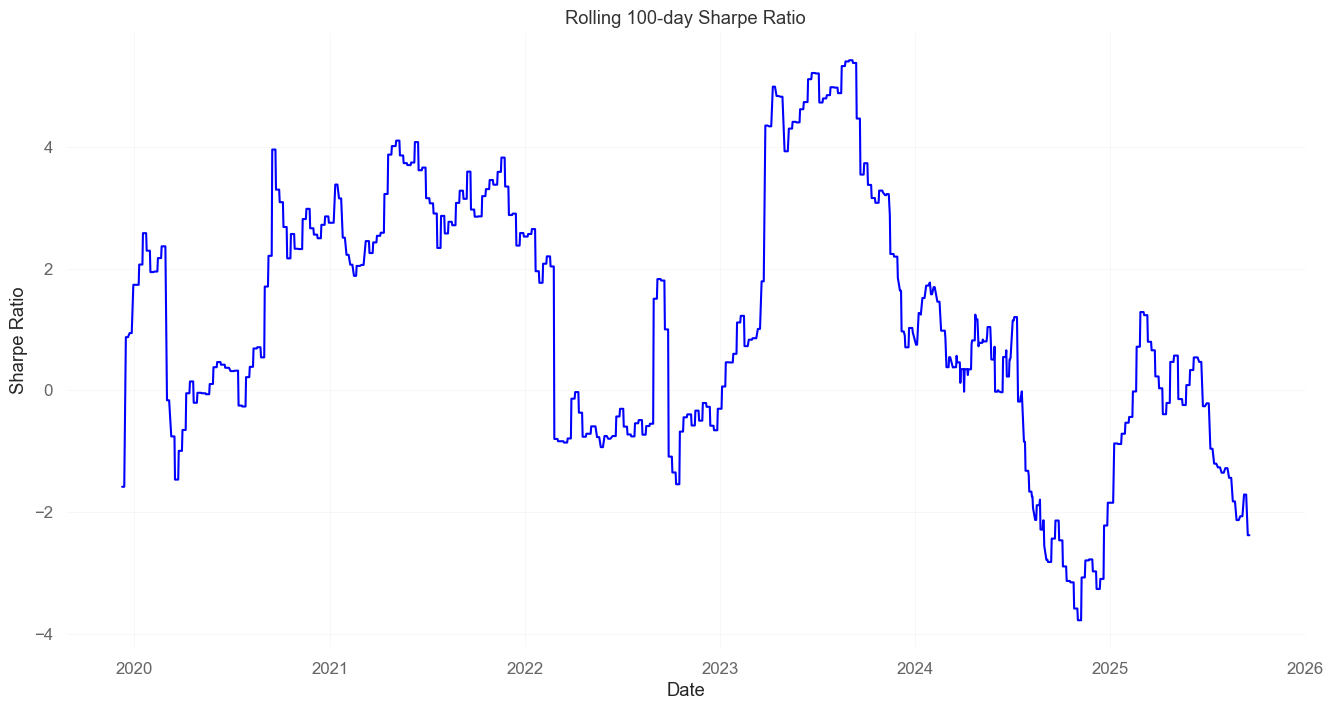

In [17]:
rolling_sharp(pf)

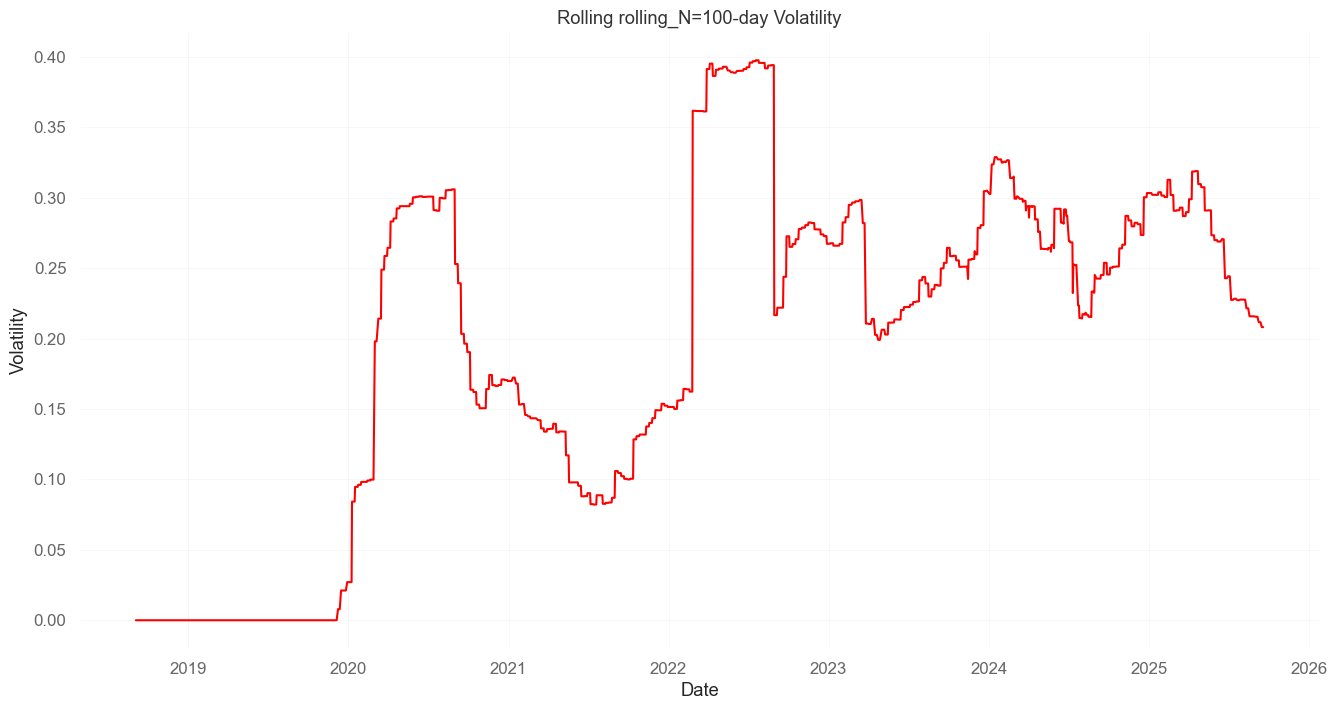

In [18]:
rolling_valatility(pf)

<Axes: xlabel='return', ylabel='Count'>

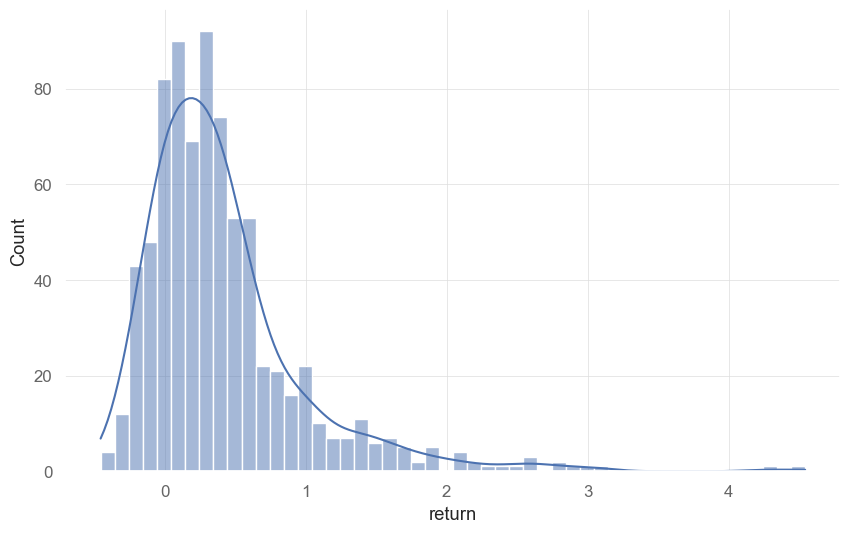

In [19]:
import seaborn as sns
sns.histplot(pf.trades.records['return'], bins=50, kde=True)


In [20]:
extended_portfolio_stats = extended_stats(pf)
print(extended_portfolio_stats)

Start                                 2018-01-05 00:00:00
End                                   2025-09-18 00:00:00
Period                                 1507 days 00:00:00
Start Value                                     1000000.0
End Value                                  1803192.862366
Total Return [%]                                80.319286
Benchmark Return [%]                            57.127274
Max Gross Exposure [%]                              100.0
Total Fees Paid                              42891.540698
Max Drawdown [%]                                39.352726
Max Drawdown Duration                   271 days 00:00:00
Total Trades                                          804
Total Closed Trades                                   780
Total Open Trades                                      24
Open Trade PnL                                        0.0
Win Rate [%]                                    80.641026
Best Trade [%]                                 454.314694
Worst Trade [%

In [21]:
save_portfolio_stats(extended_portfolio_stats, file_path=backtesting)

✅ Статистика сохранена в CSV: reports/strategies/LGBM_Classifier.csv
